<a id='import_lib'></a>
# 1.IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import AdaBoostClassifier

***

<a id='read_data'></a>
# 2.READ DATA

In [458]:
df=pd.read_csv(r"C:\Users\Sai Vighnesh Ivaturi\Downloads\train_MpHjUjU.csv")

In [634]:
df.head(10)

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1/1/2016,1,28,Male,C23,Master,57387,12/24/2015,1,1,2381060,2,0
1,2/1/2016,1,28,Male,C23,Master,57387,12/24/2015,1,1,-665480,2,0
2,3/1/2016,1,28,Male,C23,Master,57387,12/24/2015,1,1,0,2,1
3,11/1/2017,2,31,Male,C7,Master,67016,11/6/2017,2,2,0,1,0
4,12/1/2017,2,31,Male,C7,Master,67016,11/6/2017,2,2,0,1,0
5,12/1/2016,4,43,Male,C13,Master,65603,12/7/2016,2,2,0,1,0
6,1/1/2017,4,43,Male,C13,Master,65603,12/7/2016,2,2,0,1,0
7,2/1/2017,4,43,Male,C13,Master,65603,12/7/2016,2,2,0,1,0
8,3/1/2017,4,43,Male,C13,Master,65603,12/7/2016,2,2,350000,1,0
9,4/1/2017,4,43,Male,C13,Master,65603,12/7/2016,2,2,0,1,1


**Converting the Target variable into binary format**

In [460]:
df["Target"]=df['Target'].replace(to_replace=[True,False],value=[0,1])

In [461]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1/1/2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,2381060,2,0
1,2/1/2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,-665480,2,0
2,3/1/2016,1,28,Male,C23,Master,57387,12/24/2015,3/11/2016,1,1,0,2,1
3,11/1/2017,2,31,Male,C7,Master,67016,11/6/2017,NaN,2,2,0,1,0
4,12/1/2017,2,31,Male,C7,Master,67016,11/6/2017,NaN,2,2,0,1,0


In [462]:
df = df.rename(columns={"MMM-YY":"Reporting_Date"})


In [463]:
df.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1/1/2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,2381060,2,0
1,2/1/2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,-665480,2,0
2,3/1/2016,1,28,Male,C23,Master,57387,12/24/2015,3/11/2016,1,1,0,2,1
3,11/1/2017,2,31,Male,C7,Master,67016,11/6/2017,NaN,2,2,0,1,0
4,12/1/2017,2,31,Male,C7,Master,67016,11/6/2017,NaN,2,2,0,1,0


***

<a id='dimensions'></a>
# 3.DIMENSIONS OF THE DATA

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Reporting_Date        19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
 13  Target                19104 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.0+ MB


(19104, 14)

**Dataframe consists of 14 columns and 19104 data points**

***

<a id='missing'></a>
# 4.MISSING VALUES

In [464]:
df.isnull().sum()

Reporting_Date              0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
Target                      0
dtype: int64

In [465]:
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False': sorts values in the descending order
total_nulls = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
percent_null = (df.isnull().sum()*100/df.isnull().count())  
percent_null = percent_null.sort_values(ascending = False) 

# concat the 'total_nulls' and 'percent_null' columns
# 'axis = 1' stands for columns
missing_values = pd.concat([total_nulls, percent_null], axis = 1, keys = ['Total Nulls', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_values['Data Type'] = df[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of Missing Values,Data Type
LastWorkingDate,17488,91.541039,object
Reporting_Date,0,0.000000,object
Emp_ID,0,0.000000,int64
Age,0,0.000000,int64
Gender,0,0.000000,object
City,0,0.000000,object
Education_Level,0,0.000000,object
Salary,0,0.000000,int64
Dateofjoining,0,0.000000,object
Joining Designation,0,0.000000,int64




<div class="alert alert-block alert-info">
<b>Last working data is not much usefull as we have derived the target variable based on the last working date.Lets drop the column</b>
    
</div>


In [466]:
df=df.drop(['LastWorkingDate'],axis=1)

In [467]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Reporting_Date        19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   Joining Designation   19104 non-null  int64 
 9   Designation           19104 non-null  int64 
 10  Total Business Value  19104 non-null  int64 
 11  Quarterly Rating      19104 non-null  int64 
 12  Target                19104 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.9+ MB


(19104, 13)

In [468]:
df.head()

,Reporting_Date,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1/1/2016,1,28,Male,C23,Master,57387,12/24/2015,1,1,2381060,2,0
1,2/1/2016,1,28,Male,C23,Master,57387,12/24/2015,1,1,-665480,2,0
2,3/1/2016,1,28,Male,C23,Master,57387,12/24/2015,1,1,0,2,1
3,11/1/2017,2,31,Male,C7,Master,67016,11/6/2017,2,2,0,1,0
4,12/1/2017,2,31,Male,C7,Master,67016,11/6/2017,2,2,0,1,0


<div class="alert alert-block alert-info">
<b>If we observe Emp_ID column carefully there are repeated points of EMp_ID column for the same employee. But total bussiness value is different for every datapoint of the same Emp_ID.So we can create a new dataframe by grouping the employee id with all other columns and aggregating by sum of total business value columns</b>
    
</div>


In [469]:
grouping=df.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',
                       'Quarterly Rating','Target'].tail(1)
grouping.reset_index(drop=True,inplace=True)
grouped=df.groupby('Emp_ID').agg({'Total Business Value':'sum'})
grouped.reset_index(drop=True,inplace=True)
df1=pd.concat([grouping,grouped],axis=1,ignore_index=False)

<ipython-input-469-3e50b44a08f2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouping=df.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',


#### New data frame

In [470]:
df1.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
0,1,28,Male,C23,Master,57387,1,1,2,1,1715580
1,2,31,Male,C7,Master,67016,2,2,1,0,0
2,4,43,Male,C13,Master,65603,2,2,1,1,350000
3,5,29,Male,C9,College,46368,1,1,1,1,120360
4,6,31,Female,C11,Bachelor,78728,3,3,2,0,1265000


***

<a id='description'></a>
# 5.STATISTICAL DESCIPTION OF THE DATA

In [471]:
df1.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03
mean,1397.559009,33.663167,59334.157077,1.820244,2.096598,1.427971,0.678706,4.586742e+06
std,806.161628,5.983375,28383.666384,0.841433,0.941522,0.809839,0.467071,9.127115e+06
min,1.000000,21.000000,10747.000000,1.000000,1.000000,1.000000,0.000000,-1.385530e+06
25%,695.000000,29.000000,39104.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00
50%,1400.000000,33.000000,55315.000000,2.000000,2.000000,1.000000,1.000000,8.176800e+05
75%,2100.000000,37.000000,75986.000000,2.000000,3.000000,2.000000,1.000000,4.173650e+06
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,4.000000,1.000000,9.533106e+07



<div class="alert alert-block alert-info">
<b>The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.</b>
    
</div>


***

<a id='eda'></a>
# 6.EXPLORATORY DATA ANALYSIS

<a id='empid'></a>
### 6.1 Emp_ID

<a id='histogram'></a>
#### 6.1.1 HISTOGRAM

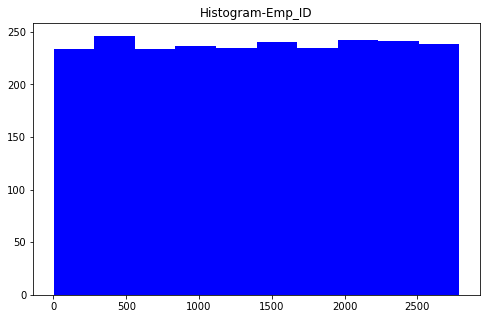

In [746]:
##Histogram
plt.hist(df1.Emp_ID,color='blue')
plt.title('Histogram-Emp_ID')

plt.rcParams['figure.figsize'] = [8,5]
plt.show()

<a id='box'></a>
#### 6.1.2 BOX PLOT

<AxesSubplot:>

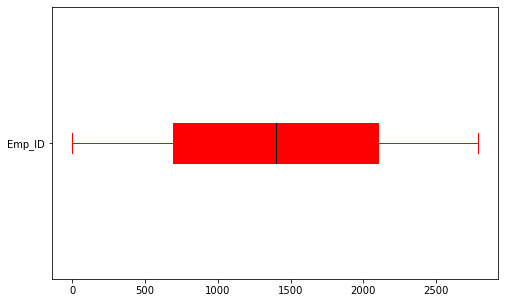

In [118]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df1.Emp_ID.plot.box(color=props2, patch_artist = True, vert = False)

In [747]:
df1.groupby("Target")["Emp_ID"].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,765.0,1363.271895,804.270781,2.0,642.00,1325.0,2070.00,2788.0
1,1616.0,1413.790223,806.795528,1.0,724.75,1430.5,2116.25,2787.0



<div class="alert alert-block alert-info">
<b>There are 765 emp id who are still in company and 1616 emp id who left the company</b>
    
</div>


<a id='Age'></a>
### 6.2 Age

<a id='agehist'></a>
#### 6.2.1 Histogram

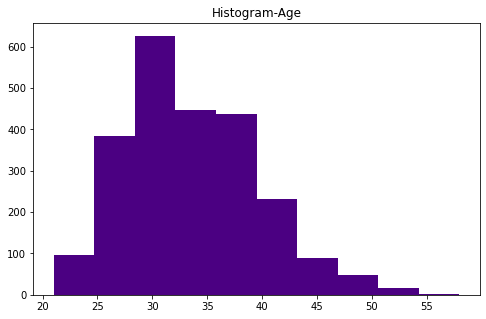

In [127]:
##Histogram
plt.hist(df1.Age,color='indigo')
plt.title('Histogram-Age')

plt.rcParams['figure.figsize'] = [8,5]
plt.show()

<a id='agebox'></a>
#### 6.2.2 Box plot

<AxesSubplot:>

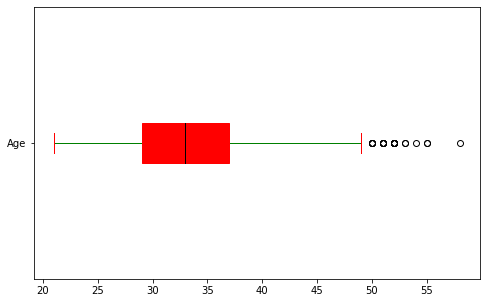

In [128]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df1.Age.plot.box(color=props2, patch_artist = True, vert = False)

Calculationg the outliers for age variable

In [129]:
IQR=df1.Age.quantile(0.75)-df1.Age.quantile(0.25)
LL=df1.Age.quantile(0.25)-(1.5*IQR)
UL=df1.Age.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  8.0
LL:  17.0
UL:  49.0


In [133]:
low_lim_len=len(df1.Age[df1.Age<LL])

In [139]:
LowerLimit_perc=low_lim_len/len(df1)
print('Lower Limit Percentage :',LowerLimit_perc)

Lower Limit Percentage : 0.0


In [135]:
Upper_lim_len=len(df1.Age[df1.Age>UL])

In [138]:
UpperLimit_perc=Upper_lim_len/len(df1)
print('Upper Limit Percentage :',UpperLimit_perc)

Upper Limit Percentage : 0.010499790004199917



<div class="alert alert-block alert-info">
<b>Since the percentage of outliers are only 1% we can consider them for model</b>
    
</div>


In [140]:
df1.groupby("Target")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,765.0,34.34902,5.880553,22.0,30.0,34.0,38.0,55.0
1,1616.0,33.33849,6.005975,21.0,29.0,33.0,37.0,58.0


<a id='agescatter'></a>
#### 6.2.3 Scatter plot between Age and Emp_ID with target variable as hue

<AxesSubplot:xlabel='Age', ylabel='Emp_ID'>

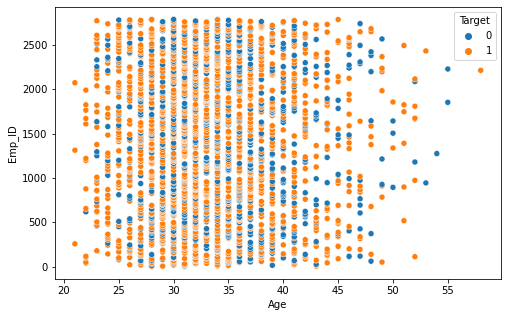

In [177]:
sns.scatterplot(x='Age',y='Emp_ID',data=df1,hue='Target')


<div class="alert alert-block alert-info">
<b>Most the Employees are aged between 25 to 40. Even they are the ones who left the company and also they are between Emp_ID below 500 to 2800</b>
    
</div>


<a id='gender'></a>
### 6.3 Gender

<a id='countgender'></a>
#### 6.3.1 Countplot

Text(0.5, 1.0, 'gender wise counting')

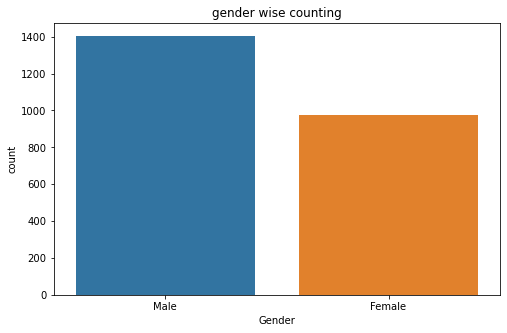

In [123]:
sns.countplot(x='Gender',data=df1)
plt.xlabel=("gender")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("gender wise counting")

In [124]:
df1.groupby("Target")["Gender"].describe()

,count,unique,top,freq
Target,,,,
0,765,2,Male,456
1,1616,2,Male,948


<a id='countgendertarget'></a>
#### 6.3.2 Countplot of gender with target variable as hue

Text(0.5, 1.0, 'gender wise counting with target')

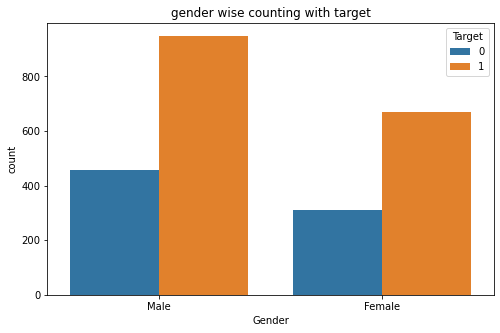

In [125]:
sns.countplot(x='Gender',hue="Target",data=df1)
plt.xlabel=("gender")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("gender wise counting with target")


<div class="alert alert-block alert-info">
<b>Employees who left the company are more in number in male category than female</b>
    
</div>


<a id='city'></a>
### 6.4 CIty

In [144]:
df1.City.value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C28     82
C3      82
C22     82
C12     81
C1      80
C5      80
C14     79
C21     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C2      72
C19     72
C13     71
C17     71
C18     69
C11     64
Name: City, dtype: int64

<a id='citycount'></a>
#### 6.4.1 Countplot

Text(0.5, 1.0, 'City wise counting')

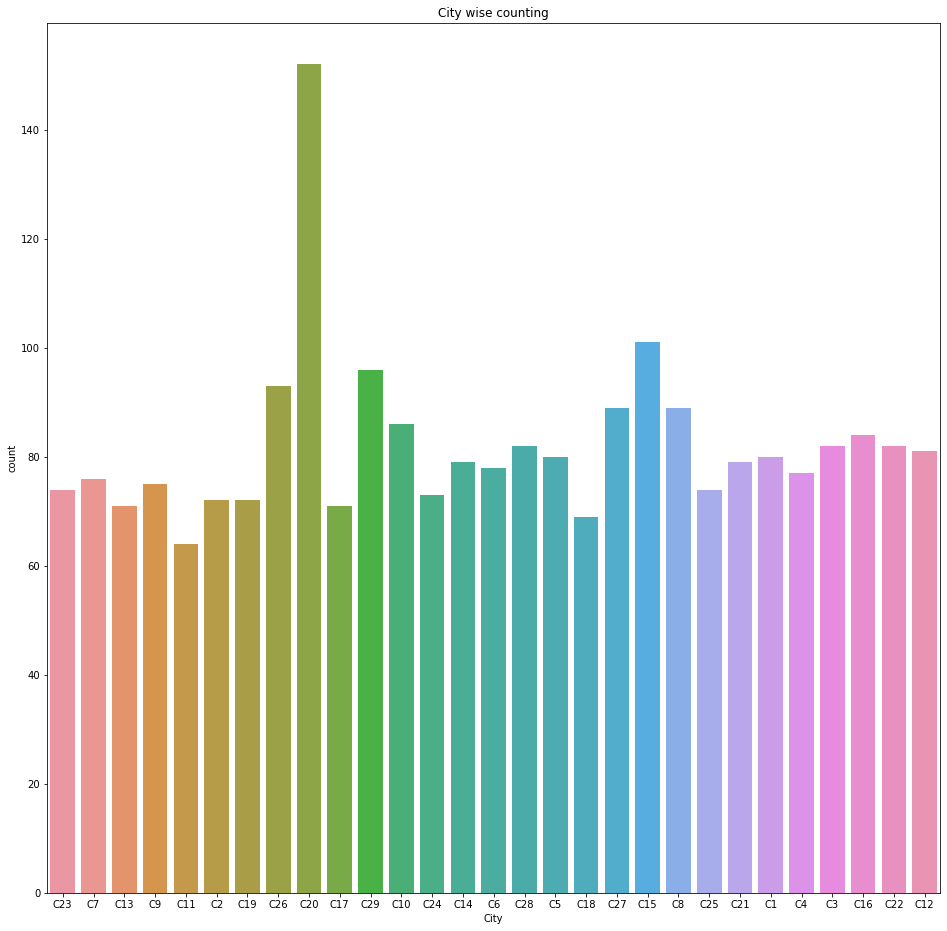

In [156]:
sns.countplot(x='City',data=df1)
plt.xlabel=("City")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [17,17]
plt.title("City wise counting")


<div class="alert alert-block alert-info">
<b>More number of employees are from city C20</b>
    
</div>


In [157]:
df1.groupby("Target")["City"].describe()

,count,unique,top,freq
Target,,,,
0,765,29,C29,45
1,1616,29,C20,111


<a id='countcitytarget'></a>
#### 6.4.2 Countplot of CIty variable with target variable as hue

Text(0.5, 1.0, 'City wise counting with target')

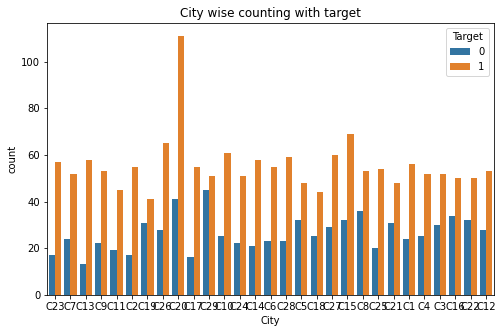

In [752]:
sns.countplot(x='City',hue="Target",data=df1)
plt.xlabel=("City")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("City wise counting with target")

<a id='education'></a>
### 6.5 Education Level

In [95]:
df1.Education_Level.value_counts()

Master      802
Bachelor    795
College     784
Name: Education_Level, dtype: int64

<a id='counteducation'></a>
#### 6.5.1 Countplot

Text(0.5, 1.0, 'Education_Level wise counting')

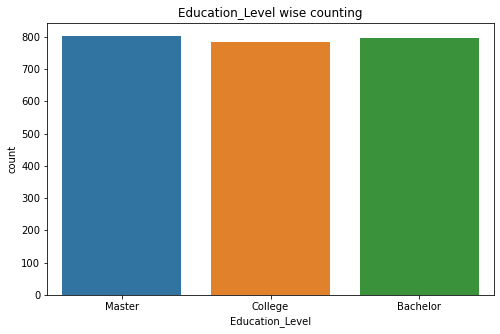

In [163]:
sns.countplot(x='Education_Level',data=df1)
plt.xlabel=("Education_Level")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [8,5]
plt.title("Education_Level wise counting")


<div class="alert alert-block alert-info">
<b>All the three differen education levles have equal number of people. But if we observe carefully we can merge Master education level and Bachelor education level into a single category as Graduate</b>
    
</div>


In [472]:
df1['Education_Level']=df1['Education_Level'].replace(to_replace=['Bachelor','Master'],value=['Graduate','Graduate'])

In [19]:
df1.Education_Level.value_counts()

Graduate    1597
College      784
Name: Education_Level, dtype: int64

<a id='count2education'></a>
#### 6.5.2 Countplot for Two cateogry Eduacation Level 

Text(0.5, 1.0, 'Education_Level wise counting')

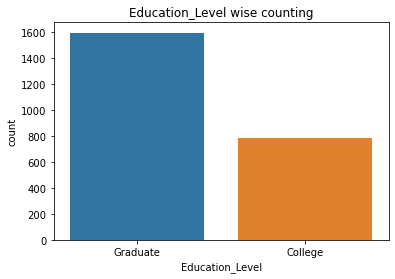

In [20]:
sns.countplot(x='Education_Level',data=df1)
plt.xlabel=("Education_Level")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [8,5]
plt.title("Education_Level wise counting")


<div class="alert alert-block alert-info">
<b>There are more employees who are graduates than from college background</b>
    
</div>


<a id='pie'></a>
#### 6.5.3 PIE CHART

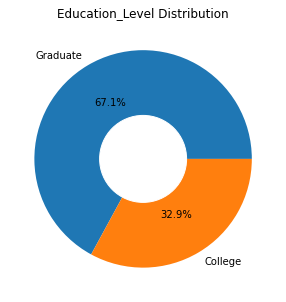

In [174]:
Frequency_by_Education_Level=df1["Education_Level"].value_counts()
keys=Frequency_by_Education_Level.keys().to_list()
counts=Frequency_by_Education_Level.to_list()
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.4,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Education_Level Distribution")
plt.show()
        


<div class="alert alert-block alert-info">
<b>67.1% of employees in data set are Graduates and only 32.9% are from college background</b>
    
</div>


In [168]:
df1.groupby("Target")["Education_Level"].describe()

,count,unique,top,freq
Target,,,,
0,765,2,Graduate,523
1,1616,2,Graduate,1074


<a id='counteducationtarget'></a>
#### 6.5.4 Countplot with Target as hue

Text(0.5, 1.0, 'Education_Level wise counting with target')

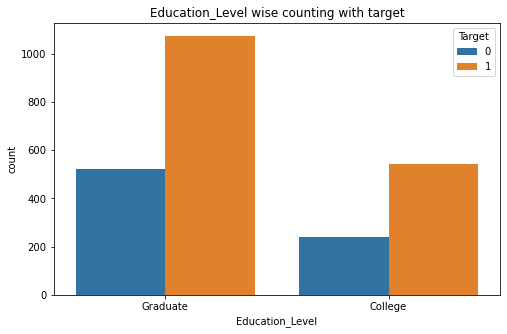

In [167]:
sns.countplot(x='Education_Level',hue="Target",data=df1)
plt.xlabel=("Education_Level")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Education_Level wise counting with target")


<div class="alert alert-block alert-info">
<b>There is more attrition in graduates then employes with college background</b>
    
</div>


<a id='salary'></a>
### 6.6 Salary

<a id='salaryhist'></a>
#### 6.6.1 Histogram

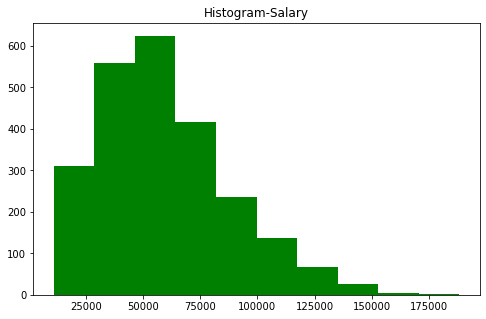

In [754]:
##Histogram
plt.hist(df1.Salary,color='green')
plt.title('Histogram-Salary')

plt.rcParams['figure.figsize'] = [8,5]
plt.show()

<a id='salarybox'></a>
#### 6.6.2 Box Plot

<AxesSubplot:>

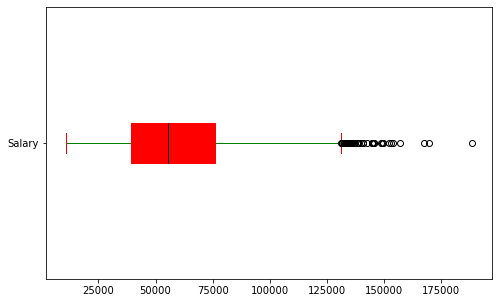

In [755]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df1.Salary.plot.box(color=props2, patch_artist = True, vert = False)

In [171]:
IQR=df1.Salary.quantile(0.75)-df1.Salary.quantile(0.25)
LL=df1.Salary.quantile(0.25)-(1.5*IQR)
UL=df1.Salary.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  36882.0
LL:  -16219.0
UL:  131309.0


In [172]:
low_lim_len=len(df1.Salary[df1.Salary<LL])

LowerLimit_perc=low_lim_len/len(df1)
print('Lower Limit Percentage :',LowerLimit_perc)


Upper_lim_len=len(df1.Salary[df1.Salary>UL])


UpperLimit_perc=Upper_lim_len/len(df1)
print('Upper Limit Percentage :',UpperLimit_perc)


Lower Limit Percentage : 0.0
Upper Limit Percentage : 0.02015959680806384



<div class="alert alert-block alert-info">
<b>Since the percentage of outliers are only 2 we can consider them for model</b>
    
</div>


In [173]:
df1.groupby("Target")["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,765.0,67662.90719,29578.579157,12938.0,46131.0,64154.0,84573.00,188418.0
1,1616.0,55391.40099,26924.959518,10747.0,36117.5,51630.0,69816.75,167758.0


<a id='scattersalaryempid'></a>
#### 6.6.3 Scatter Plot between Salary and EMP_ID

<AxesSubplot:xlabel='Salary', ylabel='Emp_ID'>

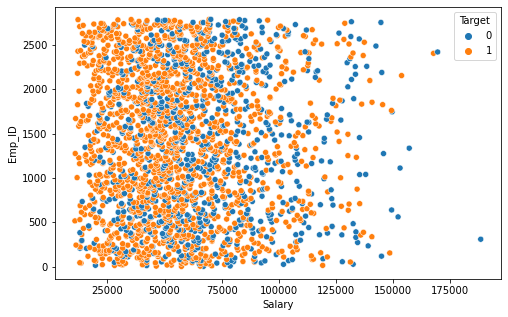

In [212]:
sns.scatterplot(x="Salary",y="Emp_ID",data=df1,hue='Target')


<div class="alert alert-block alert-info">
<b>Most the Employees are salaried between 25000 to 100000. More number attrition is also among them. Even employes with more than 10000 salary are also leaving the company</b>
    
</div>


<a id='scattersalaryage'></a>
#### 6.6.3 Scatter Plot between Salary and Age

<AxesSubplot:xlabel='Salary', ylabel='Age'>

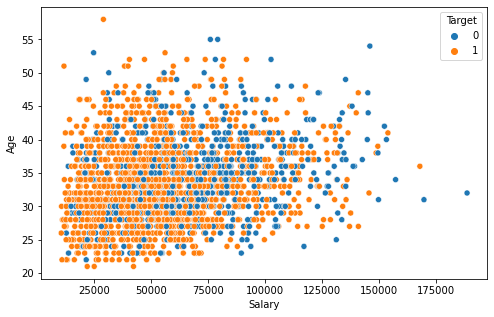

In [211]:
sns.scatterplot(x="Salary",y="Age",data=df1,hue='Target')


<div class="alert alert-block alert-info">
<b>Most of the Employees with salary between 25000 to 100000 are aged between 20to 45. More number attrition is also among them.</b>
    
</div>


<a id='designation'></a>
### 6.7 Designation

In [179]:
df1.Designation.value_counts()

2    855
1    741
3    623
4    138
5     24
Name: Designation, dtype: int64

<a id='countdesignation'></a>
#### 6.7.1 Count plot

Text(0.5, 1.0, 'Designation wise counting')

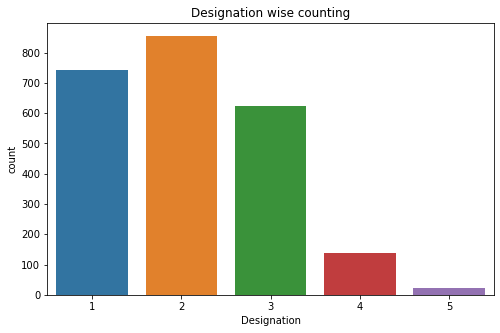

In [180]:
sns.countplot(x='Designation',data=df1)
plt.xlabel=("Designation")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [8,5]
plt.title("Designation wise counting")


<div class="alert alert-block alert-info">
<b>Employes with designation 2 are more in number than remaining followed by 1. Least number of employes are in 4 and 5.</b>
    
</div>


<a id='designpie'></a>
#### 6.7.2 PIE CHART

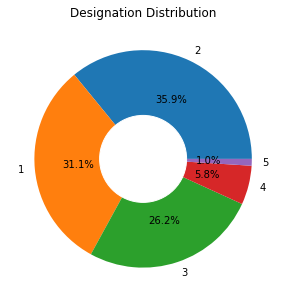

In [181]:
Frequency_by_Designation=df1["Designation"].value_counts()
keys=Frequency_by_Designation.keys().to_list()
counts=Frequency_by_Designation.to_list()
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.4,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Designation Distribution")
plt.show()
        


<div class="alert alert-block alert-info">
<b>35.9% of employes are with designation 2 followed by 31,1% and only 1% employes are with designation 1.</b>
    
</div>


In [182]:
df1.groupby("Target")["Designation"].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,765.0,2.405229,0.940911,1.0,2.0,2.0,3.0,5.0
1,1616.0,1.950495,0.906133,1.0,1.0,2.0,3.0,5.0


<a id='countdesignationtarget'></a>
#### 6.7.3 Countplot with Target as hue

Text(0.5, 1.0, 'Designation wise counting with target')

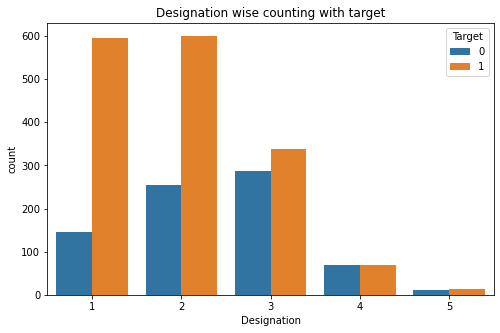

In [183]:
sns.countplot(x='Designation',hue="Target",data=df1)
plt.xlabel=("Designation")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Designation wise counting with target")


<div class="alert alert-block alert-info">
<b>There is more attrition rate among employes in designation2 and designantion 1. People with designation 4 have equal retaining and attrition rate</b>
    
</div>


<a id='joiningdesignation'></a>
### 6.8 Joining Designation

In [184]:
df1['Joining Designation'].value_counts()

1    1026
2     815
3     493
4      36
5      11
Name: Joining Designation, dtype: int64

<a id='countjoiningdesignation'></a>
#### 6.8.1 Countplot

Text(0.5, 1.0, 'Joining Designation wise counting')

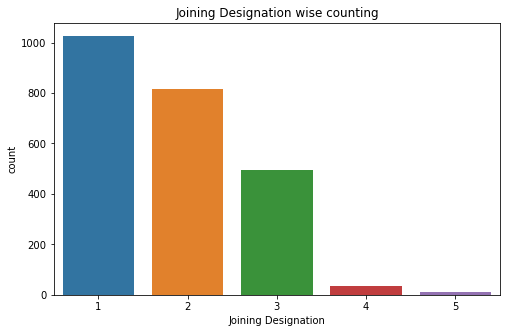

In [185]:
sns.countplot(x='Joining Designation',data=df1)
plt.xlabel=("Joining Designation")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [8,5]
plt.title("Joining Designation wise counting")

<a id='joiningdesigpie'></a>
#### 6.8.2 PIE CHART

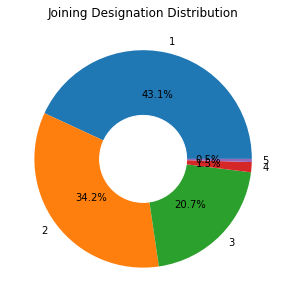

In [189]:
Frequency_by_Joining_Designation=df1["Joining Designation"].value_counts()
keys=Frequency_by_Joining_Designation.keys().to_list()
counts=Frequency_by_Joining_Designation.to_list()
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.4,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Joining Designation Distribution")
plt.show()
        

In [190]:
df1.groupby("Target")["Joining Designation"].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,765.0,1.976471,0.867970,1.0,1.0,2.0,3.0,5.0
1,1616.0,1.746287,0.818508,1.0,1.0,2.0,2.0,5.0


<a id='countjoiningdesignationtarget'></a>
#### 6.8.3 Countplot with target as hue

Text(0.5, 1.0, 'Joining Designation wise counting with target')

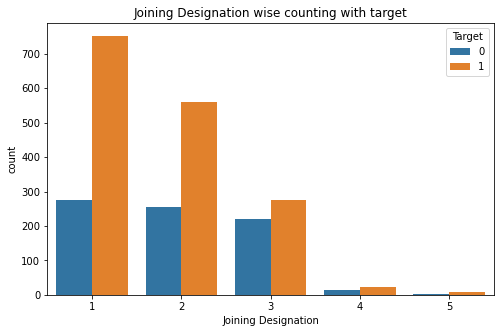

In [191]:
sns.countplot(x='Joining Designation',hue="Target",data=df1)
plt.xlabel=("Joining Designation")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Joining Designation wise counting with target")

<a id='quarterlyrating'></a>
### 6.9 Quarterly Rating

In [193]:
df1['Quarterly Rating'].value_counts()

1    1744
2     362
3     168
4     107
Name: Quarterly Rating, dtype: int64

<a id='countqurterlyrating'></a>
#### 6.9.1 Count Plot

Text(0.5, 1.0, 'Quarterly Rating wise counting')

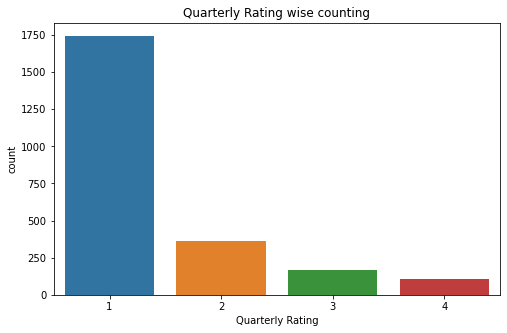

In [194]:
sns.countplot(x='Quarterly Rating',data=df1)
plt.xlabel=("Quarterly Rating")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [8,5]
plt.title("Quarterly Rating wise counting")


<div class="alert alert-block alert-info">
<b>There are more employess with Rating 1 and very less numbers with rating 4. Lets see the percentage of employess with each rating</b>
    
</div>


<a id='quarterlyratingpie'></a>
#### 6.9.2 PIE CHART

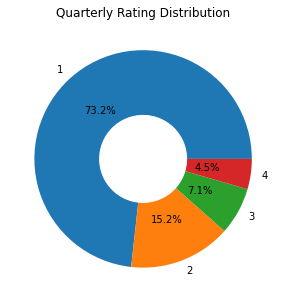

In [196]:
Frequency_by_Quarterly_Rating=df1["Quarterly Rating"].value_counts()
keys=Frequency_by_Quarterly_Rating.keys().to_list()
counts=Frequency_by_Quarterly_Rating.to_list()
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.4,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Quarterly Rating Distribution")
plt.show()
        


<div class="alert alert-block alert-info">
<b>73.2% of employess are ion 1 rating and only 4.5% people are in rating 4</b>
    
</div>


In [197]:
df1.groupby("Target")["Quarterly Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,765.0,2.028758,1.048164,1.0,1.0,2.0,3.0,4.0
1,1616.0,1.143564,0.441425,1.0,1.0,1.0,1.0,4.0


<a id='countquarterlyratingtarget'></a>
#### 6.9.3 Countplot with Target as hue

Text(0.5, 1.0, 'Quarterly Rating wise counting with target')

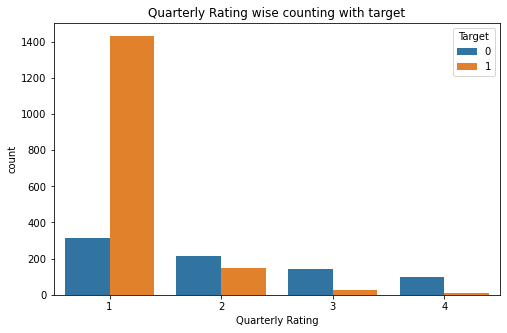

In [198]:
sns.countplot(x='Quarterly Rating',hue="Target",data=df1)
plt.xlabel=("Quarterly Rating")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Quarterly Rating wise counting with target")


<div class="alert alert-block alert-info">
<b>As expected rating 1 has more employes leaving the company than staying back </b>
    
</div>


<a id='target'></a>
### 6.10 Target

In [200]:
df1.Target.value_counts()

1    1616
0     765
Name: Target, dtype: int64

<a id='counttarget'></a>
#### 6.10.1 Count Plot

Text(0.5, 1.0, 'Target wise counting')

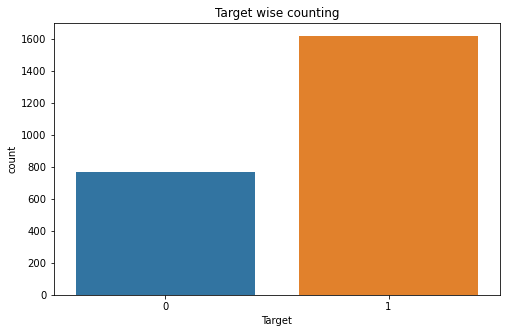

In [201]:
sns.countplot(x='Target',data=df1)
plt.xlabel=("Target")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [8,5]
plt.title("Target wise counting")


<div class="alert alert-block alert-info">
<b>From the plot we can clearly understand that there are more data points with attrition </b>
    
</div>


<a id='targetpie'></a>
#### 6.10.2 PIE CHART

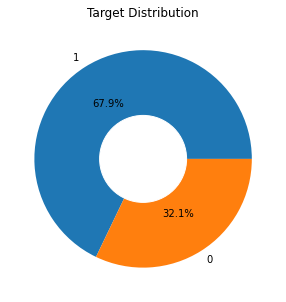

In [202]:
Frequency_by_Target=df1["Target"].value_counts()
keys=Frequency_by_Target.keys().to_list()
counts=Frequency_by_Target.to_list()
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.4,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Target Distribution")
plt.show()
        


<div class="alert alert-block alert-info">
<b>67.9% of the data has employess leaving the company </b>
    
</div>


<a id='totalbusiness'></a>
### 6.11 Total Business Value

<a id='histtotalbusiness'></a>
#### 6.11.1 Histogram

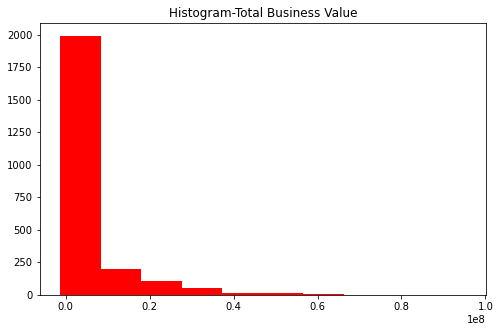

In [205]:
##Histogram
plt.hist(df1['Total Business Value'],color='red')
plt.title('Histogram-Total Business Value')

plt.rcParams['figure.figsize'] = [8,5]
plt.show()

<a id='totalbusinessbox'></a>
#### 6.11.2 Box PLot

<AxesSubplot:>

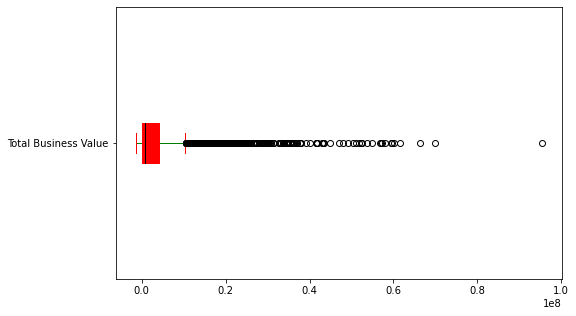

In [209]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df1['Total Business Value'].plot.box(color=props2, patch_artist = True, vert = False)

In [206]:
IQR=df1['Total Business Value'].quantile(0.75)-df1['Total Business Value'].quantile(0.25)
LL=df1['Total Business Value'].quantile(0.25)-(1.5*IQR)
UL=df1['Total Business Value'].quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  4173650.0
LL:  -6260475.0
UL:  10434125.0


In [208]:
low_lim_len=len(df1['Total Business Value'][df1['Total Business Value']<LL])

LowerLimit_perc=low_lim_len/len(df1)
print('Lower Limit Percentage :',LowerLimit_perc)


Upper_lim_len=len(df1['Total Business Value'][df1['Total Business Value']>UL])


UpperLimit_perc=Upper_lim_len/len(df1)
print('Upper Limit Percentage :',UpperLimit_perc)


Lower Limit Percentage : 0.0
Upper Limit Percentage : 0.14111717765644688


<a id='scattertotalbusinessvssalary'></a>
#### 6.11.3 Scatterplot between Salary and Business value

<AxesSubplot:xlabel='Salary', ylabel='Total Business Value'>

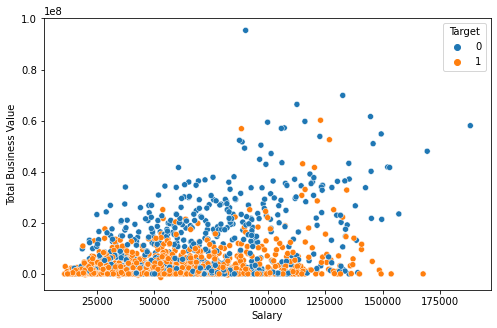

In [210]:
sns.scatterplot(x="Salary",y="Total Business Value",data=df1,hue='Target')


<div class="alert alert-block alert-info">
<b>More employess are there with salary 25000 to 10000 and they did business value less than 20 lakhs. Even they are the ones who more in number for attrition. There is one employee who's salary is 1 lakh and did highest business value. Employee with highest salary has business value of only 60 lkhs. </b>
    
</div>


<a id='scattertotalbusinessvsempid'></a>
#### 6.11.4 Scatterplot between Emp_ID and Total Business value

<AxesSubplot:xlabel='Emp_ID', ylabel='Total Business Value'>

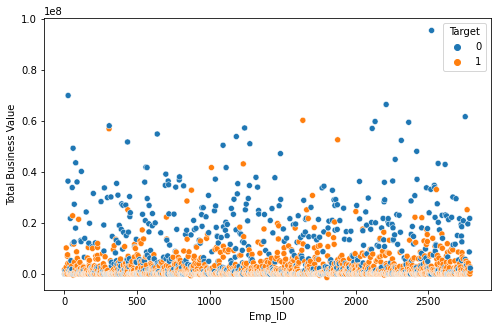

In [213]:
sns.scatterplot(x="Emp_ID",y="Total Business Value",data=df1,hue='Target')

***

<a id='smote'></a>
# 7. SMOTE

In [757]:
df1.Target.value_counts()

1    1616
0     765
Name: Target, dtype: int64


<div class="alert alert-block alert-info">
<b>From the value counts of the target variable we can observe that it is not balanced so let us balance it by using smote technique </b>
    
</div>


In [474]:
not_leaving = df1[df1.Target==0] 
len(not_leaving)

765

In [475]:
leaving = df1[df1.Target==1] 
len(leaving)

1616

In [476]:
from sklearn.utils import resample
target_upsampled1 = resample(not_leaving,
                          replace=True, # sample with replacement
                          n_samples=len(leaving), 
                          random_state=27) # reproducible results
target_upsampled1

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
54,68,32,Male,C29,College,79288,1,3,3,0,27309820
2163,2537,36,Female,C20,College,75344,2,2,1,0,412310
1662,1955,29,Male,C3,Graduate,79676,3,3,1,0,0
2350,2752,29,Male,C20,Graduate,66945,2,2,2,0,1038200
875,1029,24,Male,C17,College,20363,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1217,1432,34,Male,C26,College,29365,1,2,3,0,16090900
2130,2497,39,Female,C4,College,52092,3,3,2,0,1697840
1614,1894,33,Female,C7,Graduate,51264,3,3,1,0,0
1499,1758,40,Male,C27,Graduate,67685,3,3,1,0,0


In [477]:
df_emp = pd.concat([leaving, target_upsampled1]) 
df_emp

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
0,1,28,Male,C23,Graduate,57387,1,1,2,1,1715580
2,4,43,Male,C13,Graduate,65603,2,2,1,1,350000
3,5,29,Male,C9,College,46368,1,1,1,1,120360
5,8,34,Male,C2,College,70656,3,3,1,1,0
7,12,35,Male,C23,Graduate,28116,1,1,1,1,2607180
...,...,...,...,...,...,...,...,...,...,...,...
1217,1432,34,Male,C26,College,29365,1,2,3,0,16090900
2130,2497,39,Female,C4,College,52092,3,3,2,0,1697840
1614,1894,33,Female,C7,Graduate,51264,3,3,1,0,0
1499,1758,40,Male,C27,Graduate,67685,3,3,1,0,0


In [478]:
df_emp.reset_index(drop=True,inplace=True)

In [480]:
df_emp.Target.value_counts()

0    1616
1    1616
Name: Target, dtype: int64

***

<a id='modelbuilding'></a>
# 8. MODEL BUILDING

In [481]:
df_a=df_emp.copy()

<a id='labelencoding'></a>
### 8.1 Label encoding 

In [482]:
le=LabelEncoder()
df_a['Gender']=le.fit_transform(df_a['Gender'])
df_a['Education_Level']=le.fit_transform(df_a['Education_Level'])
df_a['City']=le.fit_transform(df_a['City'])

<a id='scaling'></a>
### 8.2 Scaling 

In [484]:
df_a.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
0,1,28,1,15,1,57387,1,1,2,1,1715580
1,4,43,1,4,1,65603,2,2,1,1,350000
2,5,29,1,28,0,46368,1,1,1,1,120360
3,8,34,1,11,0,70656,3,3,1,1,0
4,12,35,1,15,1,28116,1,1,1,1,2607180


In [679]:
scaling=df_a[['Age','Salary','Total Business Value']]

In [837]:
coded_df=df_a[['Emp_ID','Gender','City','Education_Level','Joining Designation','Designation','Quarterly Rating','Target']]

In [838]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
stc=StandardScaler()
minmax=MinMaxScaler()

In [839]:
scaled=stc.fit_transform(scaling)
scaled

array([[-0.97424354, -0.1516258 , -0.38738133],
       [ 1.56439267,  0.13473415, -0.51314505],
       [-0.80500112, -0.53568133, -0.53429386],
       ...,
       [-0.12803147, -0.36503645, -0.54537847],
       [ 1.05666543,  0.20730004, -0.54537847],
       [ 0.88742302,  1.27693251,  2.14866349]])

In [840]:
scaled_df=pd.DataFrame(scaled,columns=scaling.columns)

In [841]:
df_scaled=pd.concat([scaled_df,coded_df],axis=1)

<a id='splitingdata'></a>
### 8.3 Splitiing the data frame

In [842]:
x=df_scaled.drop(['Target','Emp_ID'],axis=1)
y=df_scaled[['Target']]

In [843]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

<a id='models'></a>
### 8.4 Models

<a id='logistic'></a>
#### 8.4.1 Logistic regression

In [759]:
lr=LogisticRegression()
lrscaledmodel=lr.fit(xtrain,ytrain)

C:\Users\Sai Vighnesh Ivaturi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [760]:
Logistic_scaledpred=lrscaledmodel.predict(xtest)

In [762]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [761]:
print(classification_report(ytest,Logistic_scaledpred))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       378
           1       0.72      0.82      0.76       430

    accuracy                           0.73       808
   macro avg       0.74      0.73      0.73       808
weighted avg       0.73      0.73      0.73       808



In [764]:
acc_lr=accuracy_score(ytest,Logistic_scaledpred)*100
acc_lr=round(acc_lr,2)
acc_lr

73.14

<a id='tree'></a>
#### 8.4.2 Decision tree

In [765]:
dtc=DecisionTreeClassifier()
dtcscaledmodel=dtc.fit(xtrain,ytrain)

In [766]:
treepred_scaled=dtcscaledmodel.predict(xtest)


In [768]:
print(classification_report(ytest,treepred_scaled))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       378
           1       0.86      0.75      0.80       430

    accuracy                           0.80       808
   macro avg       0.81      0.81      0.80       808
weighted avg       0.81      0.80      0.80       808



In [767]:
acc_dtc=accuracy_score(ytest,treepred_scaled)*100
acc_dtc=round(acc_dtc,2)
acc_dtc

80.2

<a id='random'></a>
#### 8.4.3 Random Forest

In [769]:
from sklearn.ensemble import RandomForestClassifier
Scaled_model = RandomForestClassifier(n_estimators=1000)
Scaled_model.fit(xtrain,ytrain)

<ipython-input-769-37bf1a3be027>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Scaled_model.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=1000)

In [770]:
RF_scaledpred=Scaled_model.predict(xtest)

In [771]:
print(classification_report(ytest,RF_scaledpred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       378
           1       0.91      0.86      0.88       430

    accuracy                           0.88       808
   macro avg       0.88      0.88      0.88       808
weighted avg       0.88      0.88      0.88       808



In [772]:
acc_RF=accuracy_score(ytest,RF_scaledpred)*100
acc_RF=round(acc_RF,2)
acc_RF

87.87

<a id='ada'></a>
#### 8.4.4 Adaboost Classifier

In [773]:
from sklearn.datasets import make_classification
scaled_clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
scaled_clf.fit(xtrain, ytrain)

C:\Users\Sai Vighnesh Ivaturi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(n_estimators=1000, random_state=0)

In [774]:
Ada_boost_scaledpred=scaled_clf.predict(xtest)

In [775]:
print(classification_report(ytest,Ada_boost_scaledpred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       378
           1       0.76      0.78      0.77       430

    accuracy                           0.75       808
   macro avg       0.75      0.75      0.75       808
weighted avg       0.75      0.75      0.75       808



In [777]:
acc_ADA=accuracy_score(ytest,Ada_boost_scaledpred)*100
acc_ADA=round(acc_ADA,2)
acc_ADA

75.5

<a id='xgb'></a>
#### 8.4.5 XGBOOST CLASSIFIER

In [778]:
model_scaled = XGBClassifier(n_estimators=1000)
model_scaled.fit(xtrain, ytrain, early_stopping_rounds=5, 
             eval_set=[(xtest, ytest)], verbose=False)

[14:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Sai Vighnesh Ivaturi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Sai Vighnesh Ivaturi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [779]:
XGboost_pred=model_scaled.predict(xtest)

In [780]:
print(classification_report(ytest,XGboost_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       378
           1       0.86      0.83      0.85       430

    accuracy                           0.84       808
   macro avg       0.84      0.84      0.84       808
weighted avg       0.84      0.84      0.84       808



In [781]:
acc_XGB=accuracy_score(ytest,XGboost_pred)*100
acc_XGB=round(acc_XGB,2)
acc_XGB

84.16

<a id='svm'></a>
#### 8.4.6 SUPPORT VECTOR MACHINE

In [666]:
from sklearn import svm
from sklearn.svm import SVC

In [846]:
svm=SVC(kernel='linear',C=1,gamma='auto')

In [847]:
svm_model=svm.fit(xtrain,ytrain)

C:\Users\Sai Vighnesh Ivaturi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [848]:
svm_pred=svm.predict(xtest)

In [849]:
print(classification_report(ytest,svm_pred))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66       378
           1       0.69      0.89      0.78       430

    accuracy                           0.73       808
   macro avg       0.75      0.72      0.72       808
weighted avg       0.75      0.73      0.72       808



In [863]:
acc_SVM=accuracy_score(ytest,svm_pred)*100
acc_SVM=round(acc_SVM,2)
acc_SVM

73.14

***

<a id='pca'></a>
# 9. PCA

In [869]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [851]:
df_a.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
0,1,28,1,15,1,57387,1,1,2,1,1715580
1,4,43,1,4,1,65603,2,2,1,1,350000
2,5,29,1,28,0,46368,1,1,1,1,120360
3,8,34,1,11,0,70656,3,3,1,1,0
4,12,35,1,15,1,28116,1,1,1,1,2607180


In [852]:
DF=df_a[['Age','Salary','Total Business Value']]

In [854]:
pca=DF.values
print(pca)

pcaX=scale(pca)

[[      28    57387  1715580]
 [      43    65603   350000]
 [      29    46368   120360]
 ...
 [      33    51264        0]
 [      40    67685        0]
 [      39    98374 29252710]]


In [855]:
pca=PCA(n_components=3)
pca.fit(pcaX)

var=pca.explained_variance_ratio_
var

array([0.53672605, 0.26919967, 0.19407428])

In [856]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([ 53.67,  80.59, 100.  ])

In [857]:
pca_ev=pca.components_
pca_ev

array([[ 0.49710243,  0.59798058,  0.62873556],
       [ 0.85240825, -0.47195254, -0.22507994],
       [-0.16213991, -0.64782716,  0.74433233]])

In [858]:
pca=PCA(n_components=2)
pca.fit(pcaX)
x1=pca.fit_transform(pcaX)
x1

array([[-0.81852852, -0.67170129],
       [ 0.53559925,  1.38541175],
       [-1.05642459, -0.31311461],
       ...,
       [-0.6248283 ,  0.18589855],
       [ 0.30633351,  0.9256283 ],
       [ 2.55566212, -0.32982588]])

In [860]:
columns=['pca1','pca2']

pca_df=pd.DataFrame(x1,columns=columns)

cat=df_a[['Gender','Education_Level','City','Joining Designation','Designation','Designation']]

df_pca=pd.concat([pca_df,cat],axis=1)

In [861]:
x_train,x_test,y_train,y_test=train_test_split(df_pca,y,test_size=0.25,random_state=121)

pcasvm_model=svm.fit(x_train,y_train)

C:\Users\Sai Vighnesh Ivaturi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [866]:
SVM_PCApred=pcasvm_model.predict(x_test)

print(classification_report(y_test,SVM_PCApred))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56       376
           1       0.62      0.66      0.64       432

    accuracy                           0.61       808
   macro avg       0.60      0.60      0.60       808
weighted avg       0.61      0.61      0.61       808



In [867]:
acc_pcaSVM=accuracy_score(ytest,SVM_PCApred)*100
acc_pcaSVM=round(acc_pcaSVM,2)
acc_pcaSVM

52.48

***

<a id='ac'></a>
# 10. ACCURACY COMPARISION

In [875]:

Accuracy_comp_df = pd.DataFrame({'Model':[ "LOGISITC REGRESSION","DECISION TREE","RANDOM FOREST","ADABOOST CLASSIFIER",
                   "XGBOOST CLASSIFIER","SUPPORT VECTOR CLASSIFIER","PCA WITH SUPPORT VECTOR CLASSIFIER"],
                     'Accuracy':[acc_lr,acc_dtc,acc_RF,acc_ADA,acc_XGB,acc_SVM,acc_pcaSVM] })
Accuracy_comp_df



,Model,Accuracy
0,LOGISITC REGRESSION,73.14
1,DECISION TREE,80.20
2,RANDOM FOREST,87.87
3,ADABOOST CLASSIFIER,75.50
4,XGBOOST CLASSIFIER,84.16
5,SUPPORT VECTOR CLASSIFIER,73.14
6,PCA WITH SUPPORT VECTOR CLASSIFIER,52.48


***

<a id='test'></a>
# 11. TEST DATA

In [828]:
test=pd.read_csv(r"C:\Users\Sai Vighnesh Ivaturi\Downloads\test_hXY9mYw.csv")

In [132]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [510]:
df2=df1.copy()
df2

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target,Total Business Value
0,1,28,Male,C23,Graduate,57387,1,1,2,1,1715580
1,2,31,Male,C7,Graduate,67016,2,2,1,0,0
2,4,43,Male,C13,Graduate,65603,2,2,1,1,350000
3,5,29,Male,C9,College,46368,1,1,1,1,120360
4,6,31,Female,C11,Graduate,78728,3,3,2,0,1265000
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2,3,4,0,21748820
2377,2785,34,Female,C9,College,12105,1,1,1,1,0
2378,2786,45,Male,C19,College,35370,2,2,1,1,2815090
2379,2787,28,Female,C20,Graduate,69498,1,1,1,1,977830


In [720]:
le=LabelEncoder()
df2['Gender']=le.fit_transform(df2['Gender'])
df2['City']=le.fit_transform(df2['City'])
df2['Education_Level']=le.fit_transform(df2['Education_Level'])

In [830]:
a=df2[['Age','Salary','Total Business Value']]

b=df2[['Emp_ID','Gender','City','Education_Level','Joining Designation','Designation','Target']]

c=stc.fit_transform(a)
c

d=pd.DataFrame(c,columns=a.columns)

e=pd.concat([d,b],axis=1)

In [831]:
df_test=pd.merge(test,e,on='Emp_ID')

In [832]:
test_df=df_test.drop(['Emp_ID','Target'],axis=1)

<a id='pred'></a>
### 11.1 PREDICITION

<a id='predsvm'></a>
#### 11.1.2 Predicition with SVM 

In [833]:
test_predictions=svm_model.predict(test_df)

In [834]:
np.unique(test_predictions,return_counts=True)

(array([0, 1], dtype=int64), array([543, 198], dtype=int64))

***

<a id='sub'></a>
# 12. SUBMISSION

In [877]:
import os
os.chdir(r"D:\DATA SCIENCE\Hackathons\Analytics VIdhya\submisions")

In [183]:
submission=pd.read_csv(r"C:\Users\Sai Vighnesh Ivaturi\Downloads\sample_submission_znWiLZ4.csv")

In [184]:
submission

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0


In [835]:
submission['Target']=test_predictions

In [836]:
submission.to_csv('SUBMISSION-15.csv',index=False)